In [2]:
import pandas as pd

# Load the dataset to inspect the first few rows and data types
data_path = "C:\\Users\\gorre\\Downloads\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Display the first few rows and data types for initial inspection
df.head(), df.dtypes


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\gorre\\OneDrive\\Documents\\churn data set 1.csv")

# Replace 'Yes' with 1 and 'No' with 0 for all relevant columns
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'PaperlessBilling', 'Churn']
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})

# Save the modified file
df.to_csv("modified_telco_customer_churn.csv", index=False)


In [4]:
# Retry saving the modified dataset to ensure the file path and permissions are correctly set
output_path_retry = "C:\\Users\\gorre\\OneDrive\\Documents\\churn data set 1.csv"
df.to_csv(output_path_retry, index=False)

output_path_retry


'C:\\Users\\gorre\\OneDrive\\Documents\\churn data set 1.csv'

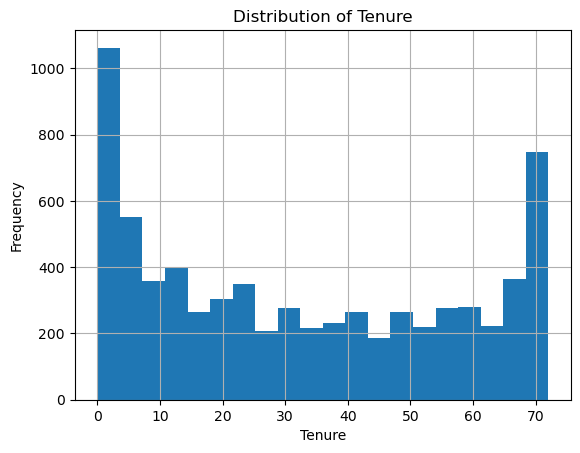

In [5]:
import matplotlib.pyplot as plt
df['tenure'].hist(bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()


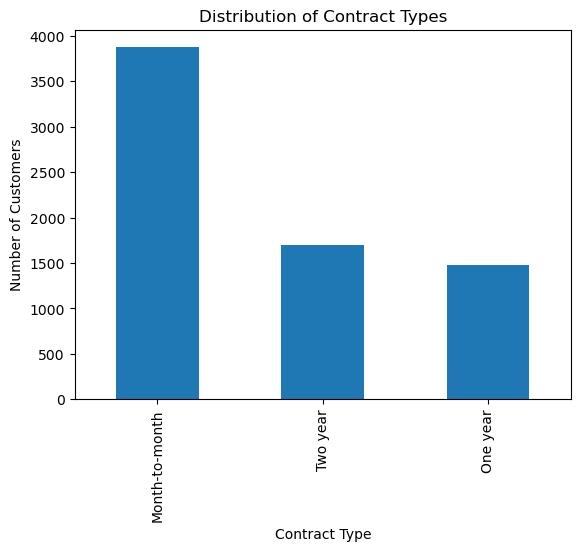

In [6]:
df['Contract'].value_counts().plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Distribution of Contract Types')
plt.show()


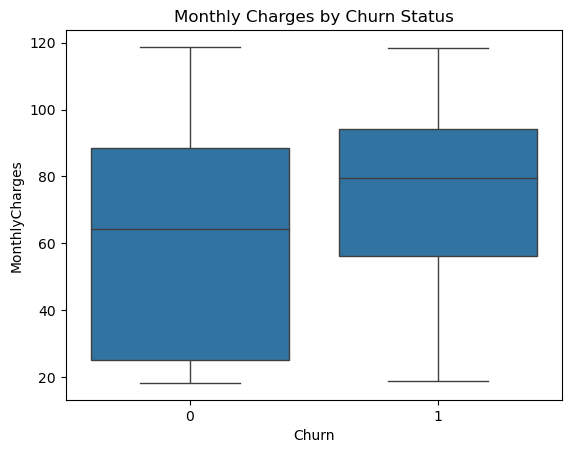

In [7]:
import seaborn as sns
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()


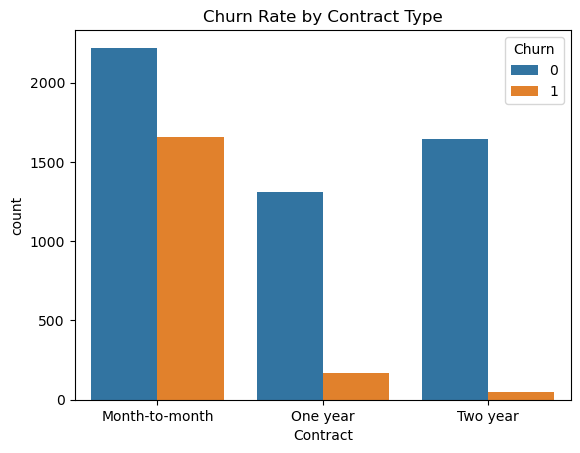

In [8]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()


In [38]:
import pandas as pd  # Import pandas

# Load your dataset (update the file path to where your dataset is stored)
df = pd.read_csv("C:\\Users\\gorre\\Downloads\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Apply one-hot encoding to specified columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


In [39]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 60], labels=['0-1 year', '1-2 years', '2+ years'])

In [40]:
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [42]:
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Convert to numeric, coercing invalid values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Option 1: Fill NaN with 0 or median
df['TotalCharges'] = df['TotalCharges'].fillna(0)


# Option 2: Drop rows with NaN
# df.dropna(subset=['TotalCharges'], inplace=True)

In [43]:
print(df['TotalCharges'].dtype)

float64


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling numerical columns
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])


In [45]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.dtypes)

customerID                                 object
gender                                     object
SeniorCitizen                               int64
Partner                                    object
Dependents                                 object
tenure                                      int64
PhoneService                               object
MultipleLines                              object
OnlineSecurity                             object
OnlineBackup                               object
DeviceProtection                           object
TechSupport                                object
StreamingTV                                object
StreamingMovies                            object
PaperlessBilling                           object
MonthlyCharges                            float64
TotalCharges                              float64
InternetService_Fiber optic                  bool
InternetService_No                           bool
Contract_One year                            bool


In [47]:
# Example of One-Hot Encoding for non-numeric columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure the train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [48]:
# Check for missing values
print(X_train.isnull().sum())

# Option 1: Fill missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Option 2: Drop rows with missing values
# X_train.dropna(inplace=True)
# X_test.dropna(inplace=True)


SeniorCitizen                          0
tenure                                 0
MonthlyCharges                         0
TotalCharges                           0
InternetService_Fiber optic            0
                                      ..
StreamingMovies_No internet service    0
StreamingMovies_Yes                    0
PaperlessBilling_Yes                   0
tenure_group_1-2 years                 0
tenure_group_2+ years                  0
Length: 5665, dtype: int64


In [49]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


Accuracy: 0.7998580553584103
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1036
         Yes       0.70      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



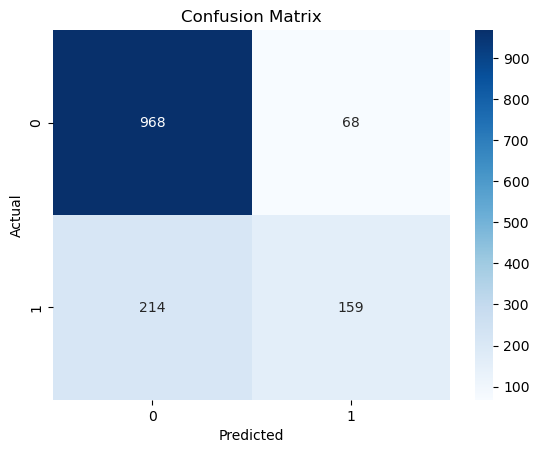

In [61]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


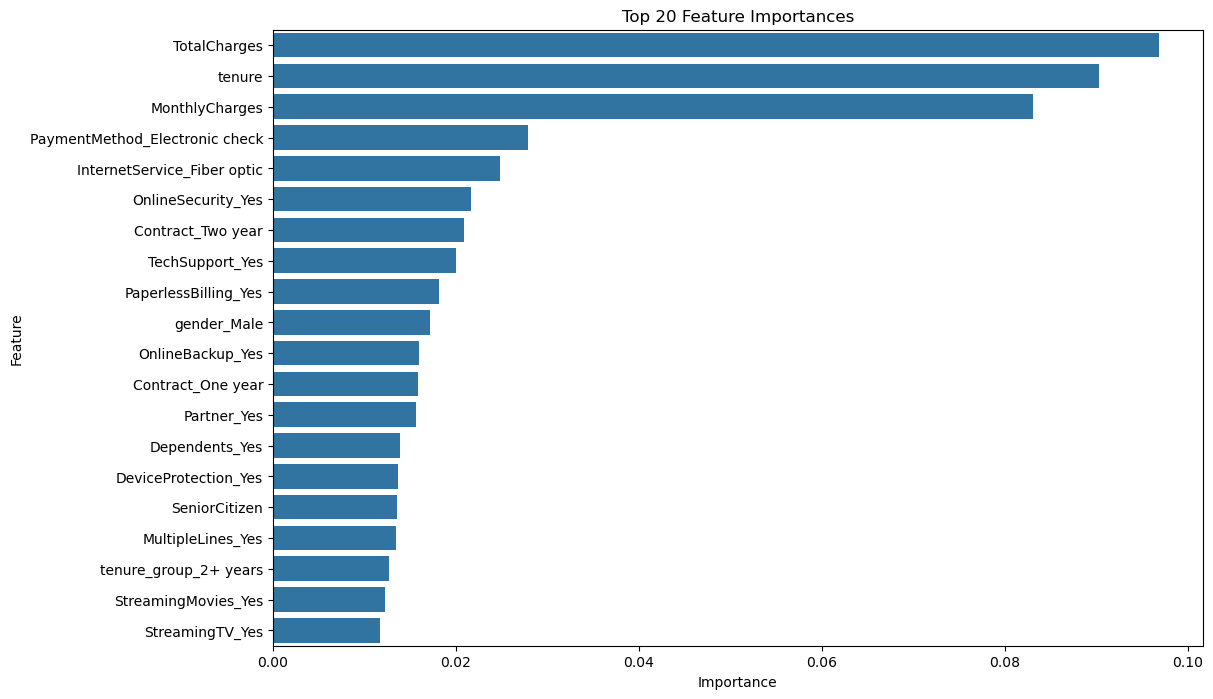

In [65]:
# Handle feature names for transformed data
if hasattr(X_train, 'columns'):
    # For Pandas DataFrame
    feature_names = X_train.columns
else:
    # For NumPy arrays after transformation
    feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

# Ensure that feature names match the number of feature importances
if len(feature_names) == len(importances):
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))  # Top 20 features
    plt.title("Top 20 Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
else:
    print("Error: Mismatched lengths between feature names and importances.")
    print(f"Feature Names Length: {len(feature_names)}, Importances Length: {len(importances)}")



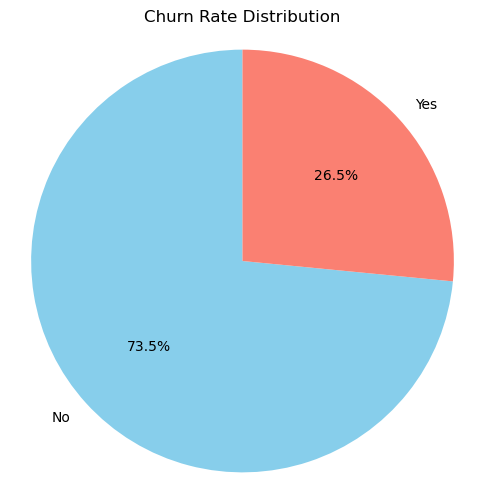

In [68]:
import matplotlib.pyplot as plt

churn_counts = y.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Rate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
